# Reste à faire

<mark>TODO</mark> : à intégrer dans le ZIP auto en tant que Nom_Prénom_1_notebook_exploratoire_mmaaaa

<mark>TODO</mark> : retrait des outliers non-officiels

<mark>TODO</mark> : voir UG 6 sections sur transformations + utilisation de Pipeline

Retraitements (`seattle_commons`) :
* Ces modulations de comportement des fonctions doivent se faire à l'aide de paramètres optionnels des fonctions.
* Si possible, s'appuyer sur des fonctions génériques communes privées pour densifier le code.
* Commençons par passer en revue chacune des variables pertinentes (l'idéal serait une fonction d'analyse et représentation graphique univariée bien construite et finie, avec version graphique compacte de toutes les analyses)

(<mark>TODO : lien vers la section NB qui effectue cette verif</mark>) (<mark>TODO : préciser la significativité à l'aide d'une $p$-value</mark>)

TODO (surfaces par usage) :
1. il faut ordonner par surface décroissante
2. comment se peut-il que certaines surfaces soient négatives !

# Feature engineering

Découverte des données à l'aide de l'analyse exploratoire.

Suppression ou correction des données aberrantes (outliers de niveau 0).

Identification et contrôle d'impact des outliers hors normes non aberrants (outliers de niveau 1).

Identification et assertion des relations (bivariées) constantes et linéaires (outliers de niveau 2).

# Chargement des données

Source : https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy

In [14]:
from pepper_commons import get_data
data = get_data()
display(data)

,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
id,,,,,,,,,,,,,,,,,,,,,
1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,...,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83
2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,...,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86
3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,...,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19
5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,...,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67
8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,...,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,2,...,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,2,...,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,7,...,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,False,NaN,Compliant,NaN,223.54,16.99


# Nettoyage des données

## Suppression des variables muettes et constantes

Suppresion des variables :
* muette `Comments`
* et constantes :
    * `DataYear` = `2016`,
    * `City` = `'Seattle'`,
    * `State` = `'WA'`.

In [15]:
from pepper_commons import bold, print_subtitle

print_subtitle('Removal of constants (invariant vars)')
print(bold('DataYear'), 'constant :', data.DataYear.unique())
print(bold('City'), 'constant :', data.City.unique())
print(bold('State'), 'constant :', data.State.unique())
print(bold('Comments'), 'constant :', data.Comments.unique())

data = data.drop(columns=['DataYear', 'City', 'State', 'Comments'])
print("⇒ ['DataYear', 'City', 'State', 'Comments'] dropped")


Removal of constants (invariant vars)
DataYear constant : [2016]
City constant : ['Seattle']
State constant : ['WA']
Comments constant : [nan]
⇒ ['DataYear', 'City', 'State', 'Comments'] dropped


## Retrait des outliers 'officiels'

Nous disposons d'une variable `Outlier` qui permet d'identifier et d'éliminer les échantillons aberrants.

Ce sont 32 individus, soit environ 1 % des cas.

In [17]:
from pepper_production import drop_class
_data, outliers = drop_class(data, data.Outlier.notna(), 'outliers')
display(outliers)

,BuildingType,PrimaryPropertyType,PropertyName,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,...,SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
id,,,,,,,,,,,,,,,,,,,,,
350,NonResidential,Large Office,Second And Spring Building,1100 Second Avenue,98101.0,0942000045,7,DOWNTOWN,47.60642,-122.33581,...,0.0,1.166315e+07,39794668.0,16048.309570,1604831.0,False,Non-Compliant,High outlier,362.66,2.10
539,NonResidential,Retail Store,University Center,4501 Roosevelt Way NE,98105.0,5335200380,4,NORTHEAST,47.66178,-122.31812,...,0.0,9.348260e+04,318963.0,0.000000,0.0,False,Non-Compliant,Low outlier,2.22,0.03
608,NonResidential,Large Office,411 1ST AVE S (ID608),411 1ST AVE S,98104.0,5247800200,2,DOWNTOWN,47.59878,-122.33458,...,0.0,4.715030e+05,1608768.0,3430.500488,343050.0,False,Non-Compliant,Low outlier,29.43,0.19
704,NonResidential,Large Office,401 Elliott Ave West,401 Elliot Ave West,98119.0,7666202110,7,MAGNOLIA / QUEEN ANNE,47.62235,-122.36378,...,0.0,7.953454e+06,27137187.0,0.000000,0.0,False,Non-Compliant,High outlier,189.18,1.46
19708,Multifamily HR (10+),High-Rise Multifamily,Bay Vista,2821 2nd Ave,98121.0,0586400000,7,DOWNTOWN,47.61706,-122.35141,...,0.0,6.265616e+05,2137828.0,2700.760010,270076.0,False,Non-Compliant,Low outlier,29.25,0.17
19934,Multifamily LR (1-4),Low-Rise Multifamily,Belmont Lofts,231 Belmont Ave E,98102.0,0704600000,3,EAST,47.62059,-122.32440,...,0.0,7.502090e+04,255971.0,0.000000,0.0,False,Non-Compliant,Low outlier,1.78,0.06
19967,SPS-District K-12,K-12 School,Queen Anne Gym,1431 2nd Ave N,98109.0,0811000005,7,MAGNOLIA / QUEEN ANNE,47.63203,-122.35337,...,0.0,7.228240e+04,246628.0,1848.439575,184844.0,True,Error - Correct Default Data,Low outlier,11.54,0.32
20367,Multifamily LR (1-4),Low-Rise Multifamily,City Lights on Harbor,2349 Harbor Ave. SW,98126.0,1595200000,1,SOUTHWEST,47.58143,-122.37510,...,0.0,2.058855e+05,702481.0,0.000000,0.0,False,Non-Compliant,Low outlier,4.90,0.07
20617,NonResidential,Retail Store,Seattle Habitat Store,21 S Nevada St,98134.0,1824049074,2,GREATER DUWAMISH,47.56535,-122.34054,...,0.0,1.436250e+04,49005.0,964.640015,96464.0,True,Error - Correct Default Data,Low outlier,5.46,0.14


## Conformité (`ComplianceStatus`)

La variable `ComplianceStatus` indique si *une propriété satisfait aux exigences en matière d'analyse comparative de l'énergie pour l'année de déclaration en cours*.

En clair : les individus non conformes comportent des données inexploitables.

Ces données inexploitables se distribuent sur 4 classes :
* les données aberrantes (`(Low|High) Outlier`),
* les données par défaut (`Error - Correct Default Data`),
* les données partielles (`Missing Data`),
* les données vides (NA) (`Non-compliant`).

Nous supprimons 133 échantillons supplémentaires : 

In [18]:
from pepper_production import drop_class
compliance = data.ComplianceStatus
print(bold('Modalities'), ':', list(compliance.unique()))
print(compliance.value_counts())
data, c = drop_class(data, data.ComplianceStatus != 'Compliant', 'not compliant')

Modalities : ['Compliant', 'Error - Correct Default Data', 'Missing Data', 'Non-Compliant']
Compliant                       3211
Error - Correct Default Data     113
Non-Compliant                     37
Missing Data                      15
Name: ComplianceStatus, dtype: int64


## <mark>TODO</mark> : retrait des outliers non-officiels

## Partition *résidentiel* vs. *non résidentiel*

In [19]:
from seattle_commons import get_family_buildings, get_business_buildings
r_data = get_family_buildings(data)                # residential subset
nr_data = get_business_buildings(data)             # non residential subset
display(nr_data)

,BuildingType,PrimaryPropertyType,PropertyName,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,...,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
id,,,,,,,,,,,,,,,,,,,,,
1,NonResidential,Hotel,Mayflower park hotel,405 Olive way,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,...,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,249.98,2.83
2,NonResidential,Hotel,Paramount Hotel,724 Pine street,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,...,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,295.86,2.86
3,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,...,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,2089.28,2.19
5,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,...,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,286.43,4.67
8,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,...,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50221,Nonresidential COS,Other,High Point Community Center,6920 34th Ave SW,NaN,2524039059,1,DELRIDGE NEIGHBORHOODS,47.54067,-122.37441,...,1.025432e+06,0.00,1.853347e+05,6.323620e+05,2997.199951,2.997200e+05,False,NaN,20.33,1.11
50223,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,NaN,3558300000,2,DOWNTOWN,47.59625,-122.32283,...,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,32.17,2.01
50224,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,NaN,1794501150,7,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,...,6.053764e+06,0.00,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,False,NaN,223.54,16.99


# Retraitement et transformation des données

Nous nous occupons ici du retraitement des données brutes en préparation de la phase de modélisation.

Les choix de traitement sont dirigés par les faits dégagés :
* en amont par l'analyse exploratoire,
* en aval par les expériences de modélisation. 

Ce sont par exemple :
* le recalcul de variables pour en corriger les erreurs, par exemple :
    * l'élimination de l'erreur de troncature sur les variables d'intensité recalculables,
    * la correction des valeurs des surfaces extérieures vs. intérieures,
* le passage au log quand cela est pertinent (skew élevé),
* l'encodage à chaud des modalités des variables catégorielles,
* le renommage de variables,
* la production des nouvelles variables de synthèse.

En particulier, chaque variable se voit attribuer :
* une notation mathématique pour la dénoter,
* un libellé court pour la désigner dans les jeux de données.

Par exemple $t_b$ et `btype` renvoient tous deux à la variable `BuildingType`.

L'ordre des sections est celui des variables :

## $i$ : **`id`** (*`OSEBuilingID`*)

A priori, l'identifiant n'a aucune incidence sur les résultats.

Mais cela reste un a priori que nous allons vérifier.

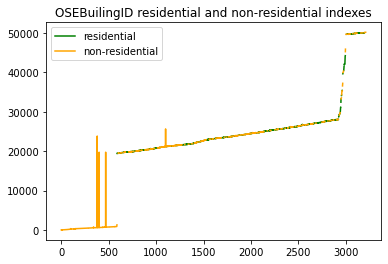

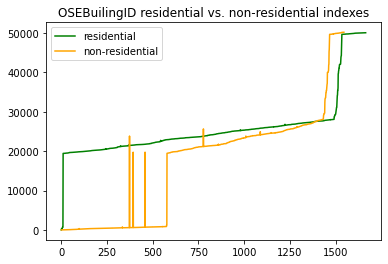

In [20]:
from seattle_commons import show_rnr_index_table, show_rnr_indexes
show_rnr_index_table(data)
show_rnr_indexes(data)

## $t_b$ : **`btype`** (*`BuildingType`*)

In [21]:
data.BuildingType.value_counts()

NonResidential          1432
Multifamily LR (1-4)     985
Multifamily MR (5-9)     570
Multifamily HR (10+)     108
Nonresidential COS        81
Campus                    24
SPS-District K-12         10
Nonresidential WA          1
Name: BuildingType, dtype: int64

### Encodage d'étiquettes

Cette méthode est à prospcrire dans ce cas d'utilisation, car elle revient à donner un caractère trompeusement ordinal à des étiquettes catégorielles.

C'est probablement une des causes principales des performances dégradées de ma première version : à vérifier.

In [22]:
from seattle_commons import get_btype_id
btype = get_btype_id(data)
display(data.BuildingType.unique())
display(btype.unique())
display(btype)

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'Campus', 'SPS-District K-12', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

array([0, 5, 1, 4, 6, 2, 3, 7], dtype=int64)

id
1        0
2        0
3        0
5        0
8        0
        ..
50221    5
50223    5
50224    5
50225    5
50226    5
Name: bid, Length: 3211, dtype: int64

L'équivalent à l'aide de l'API SK :

In [23]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder().fit(data.BuildingType)
display(le.classes_)
display(le.transform(data.BuildingType))

array(['Campus', 'Multifamily HR (10+)', 'Multifamily LR (1-4)',
       'Multifamily MR (5-9)', 'NonResidential', 'Nonresidential COS',
       'Nonresidential WA', 'SPS-District K-12'], dtype=object)

array([4, 4, 4, ..., 5, 5, 5])

### Encodage 1-parmi-$n$ (ou encodage *one-hot*)

**API** : [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

**Guide de l'utilisateur** : [**Encodage des caractéristiques catégorielles** (6.3.4)](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-categorical-features)

C'est ce qu'il faut privilégier, mais attention à l'explosion dimensionnelle.

Un bon compromis est de réduire `btype` à 3 classes parentes plus générales :
* `Multifamily`
* `NonResidential`
* `School`

Le fonction `hot_encode_btype` possède un paramètre optionnel `abstractor` qui permet de définir un *mappage* surjectif personnalisé. Son comportement par défaut est de *mapper* vers le jeu de 3 classes défini ci-dessus.

Pour un *mappage* identité, c'est-à-dire pour ne rien changer, il faut fixer `abstractor=None`.

In [24]:
# 'BuildingType' hot-encoding after class abstraction
#  with default abstractor `'abstract_btype'`
from seattle_commons import hot_encode_btype
he_btype = hot_encode_btype(data)
he_btype.loc['sum'] = he_btype.sum(axis=0)
display(he_btype)

,btype_Multifamily,btype_NonResidential,btype_School
id,,,
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
5,0.0,1.0,0.0
8,0.0,1.0,0.0
...,...,...,...
50223,0.0,1.0,0.0
50224,0.0,1.0,0.0
50225,0.0,1.0,0.0


In [25]:
# 'BuildingType' hot-encoding without class abstraction
from seattle_commons import hot_encode_btype
he_btype = hot_encode_btype(data, abstractor=None)
he_btype.loc['sum'] = he_btype.sum(axis=0)
display(he_btype)

,btype_NonResidential,btype_Multifamily LR (1-4),btype_Multifamily MR (5-9),btype_Multifamily HR (10+),btype_Nonresidential COS,btype_Campus,btype_SPS-District K-12,btype_Nonresidential WA
id,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
50223,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
50224,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
50225,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Idem sur le sous-ensemble non résidentiel :

In [26]:
from seattle_commons import hot_encode_btype
he_btype = hot_encode_btype(nr_data)
he_btype.loc['sum'] = he_btype.sum(axis=0)
display(he_btype)
abstr_he_btype = hot_encode_btype(nr_data, abstractor=None)
abstr_he_btype.loc['sum'] = abstr_he_btype.sum(axis=0)
display(abstr_he_btype)

,btype_NonResidential,btype_School
id,,
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
5,1.0,0.0
8,1.0,0.0
...,...,...
50223,1.0,0.0
50224,1.0,0.0
50225,1.0,0.0


,btype_NonResidential,btype_Nonresidential COS,btype_Campus,btype_SPS-District K-12,btype_Nonresidential WA
id,,,,,
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
50223,0.0,1.0,0.0,0.0,0.0
50224,0.0,1.0,0.0,0.0,0.0
50225,0.0,1.0,0.0,0.0,0.0


## $t_p$ : **`ptype`** (*`PrimaryPropertyType`*)

Comme pour `btype`, la méthode `get_ptype_id` ne doit pas être utilisée pour encoder les catégories de `PrimaryPropertyType`.

On utilisera exclusivement la même technique de hot-encoding que pour `btype`, avec possibilité de réaliser des abstractions qui réunissent plusieurs classes en une représentante, c'est-à-dire qui réalise une partition de l'ensemble des classes (des catégories).

<mark>Il manque un ingrédient essentiel dans le hot-encoder de SKL : ordonner les colonnes par ordre décroissant de fréquence</mark>

In [ ]:
data.PrimaryPropertyType.value_counts()

Low-Rise Multifamily           950
Mid-Rise Multifamily           551
Small- and Mid-Sized Office    286
Other                          250
Warehouse                      185
Large Office                   168
Mixed Use Property             131
High-Rise Multifamily          102
Retail Store                    84
Hotel                           76
Worship Facility                69
Distribution Center             53
K-12 School                     50
Senior Care Community           43
Supermarket / Grocery Store     39
Medical Office                  39
Self-Storage Facility           28
Residence Hall                  23
University                      22
Refrigerated Warehouse          12
Restaurant                      12
Hospital                        10
Laboratory                      10
Name: PrimaryPropertyType, dtype: int64

In [ ]:
from seattle_commons import hot_encode_catvar
hot_encode_catvar(data, 'PrimaryPropertyType', new_name='ptype')

,ptype_Low-Rise Multifamily,ptype_Mid-Rise Multifamily,ptype_Small- and Mid-Sized Office,ptype_Other,ptype_Warehouse,ptype_Large Office,ptype_Mixed Use Property,ptype_High-Rise Multifamily,ptype_Retail Store,ptype_Hotel,...,ptype_Senior Care Community,ptype_Medical Office,ptype_Supermarket / Grocery Store,ptype_Self-Storage Facility,ptype_Residence Hall,ptype_University,ptype_Refrigerated Warehouse,ptype_Restaurant,ptype_Laboratory,ptype_Hospital
id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50221,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50223,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50224,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## $l$ : **`name`** (*`PropertyName`*)

## $\pi_a$ : **`pos_adr`** (*`Address`*)

## $\pi_z$ : **`pos_zip`** (*`ZipCode`*)

## $\pi_t$ : **`pos_tax`** (*`TaxParcelIdentificationNumber`*)

## $\pi_d$ : **`pos_dst`** (*`CouncilDistrictCode`*)

## $\pi_n$ : **`pos_ngb`** (*`Neighborhood`*)

**Traitements** :
* Uniformisation des noms de quartiers (problème de casse variable).
* Encodage à chaud.

### Données brutes

In [ ]:
display(data.Neighborhood.value_counts())

DOWNTOWN                  551
EAST                      439
MAGNOLIA / QUEEN ANNE     410
GREATER DUWAMISH          357
NORTHEAST                 262
LAKE UNION                242
NORTHWEST                 198
SOUTHWEST                 147
NORTH                     136
BALLARD                   120
CENTRAL                    94
SOUTHEAST                  78
DELRIDGE                   72
North                      40
Central                    26
Northwest                  10
Ballard                     6
Delridge                    4
DELRIDGE NEIGHBORHOODS      1
Name: Neighborhood, dtype: int64

### Données corrigées

In [ ]:
from seattle_commons import get_pos_nbg
display(get_pos_nbg(data).value_counts())

DOWNTOWN                 551
EAST                     439
MAGNOLIA / QUEEN ANNE    410
GREATER DUWAMISH         357
NORTHEAST                262
LAKE UNION               242
NORTHWEST                208
NORTH                    176
SOUTHWEST                147
BALLARD                  126
CENTRAL                  120
SOUTHEAST                 78
DELRIDGE                  77
Name: pos_nbg, dtype: int64

### Encodage à chaud

In [ ]:
from seattle_commons import hot_encode_pos_nbg
hot_encode_pos_nbg(data)

,pos_nbg_DOWNTOWN,pos_nbg_EAST,pos_nbg_MAGNOLIA / QUEEN ANNE,pos_nbg_GREATER DUWAMISH,pos_nbg_NORTHEAST,pos_nbg_LAKE UNION,pos_nbg_NORTHWEST,pos_nbg_NORTH,pos_nbg_SOUTHWEST,pos_nbg_BALLARD,pos_nbg_CENTRAL,pos_nbg_SOUTHEAST,pos_nbg_DELRIDGE
id,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
50223,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50224,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## $\phi$ : **`lat.`** (*`Latitude`*)

## $\lambda$ : **`long.`** (*`Longitude`*)

## $T$ : **`age`** (*2016 - `YearBuilt`*)

In [ ]:
from seattle_commons import get_age
get_age(data)

id
1        89
2        20
3        47
5        90
8        36
         ..
50221    34
50223    12
50224    42
50225    27
50226    78
Name: age, Length: 3193, dtype: int64

## $n_b$ : **`n_b`** (*`NumberofBuildings`*)

## $n_f$ : **`n_f`** (*`NumberofFloors`*)

In [ ]:
from seattle_commons import get_n_floors
get_n_floors(data)

id
1        12
2        11
3        41
5        10
8        18
         ..
50221     1
50223     1
50224     1
50225     1
50226     1
Name: n_f, Length: 3193, dtype: int64

## $a$ : **`a`** (*`PropertyGFATotal`*)

La relation $a=a_e+a_i$ est parfaitement vérifiée ((<mark>TODO : lien vers la section NB qui effectue cette verif</mark>) (<mark>TODO : préciser la significativité à l'aide d'une $p$-value</mark>).

$s$ est la première variable à considérer en rapport avec la consommation énergétique (avant de penser la rapporter à la surface). Comment évolue le rapport ?

In [ ]:
from seattle_commons import get_area
get_area(data)

id
1         88434
2        103566
3        956110
5         61320
8        175580
          ...  
50221     18261
50223     16000
50224     13157
50225     14101
50226     18258
Name: a, Length: 3193, dtype: int64

## $a_o$ : **`a_o`** (*`PropertyGFAParking`*)

Le nom de la variable brute est trompeur. Il s'agit en réalité de toute la surface extérieure (*outer area*) de la propriété, dont les surfaces éventuelles de parking non couvert et de terrain non bâti qui n'est pas nécessairement du parking.

In [ ]:
from seattle_commons import get_outer_area
get_outer_area(data)

## $a_i$ : **`a_i`** (*`PropertyGFABuilding(s)`*)

*inner area*

In [ ]:
from seattle_commons import get_inner_area
get_inner_area(data)

## $[\tilde{a_i}, \tilde{a_o}]  = \left[\frac{a_i}{a}, \frac{a_o}{a}\right]$ : **`[_a_i, _a_o]`**

Parts relatives de surface intérieure et extérieure dans la surface totale de la propriété.

In [ ]:
from seattle_commons import get_inner_outer_area_distribution
get_inner_outer_area_distribution(data)

,_a_i,_a_o
id,,
1,1.000000,0.000000
2,0.854547,0.145453
3,0.794252,0.205748
5,1.000000,0.000000
8,0.646885,0.353115
...,...,...
50221,1.000000,0.000000
50223,1.000000,0.000000
50224,1.000000,0.000000


#### $\tilde{a}_{u_k}, k = 0, 1, \cdots, |U| - 1$ : **`_a_<usage>`** (modalités *`*PropertyUseType`*) USAGES

### Prototype

In [29]:
from seattle_commons import get_use_area_distribution
_ua_d = get_use_area_distribution(data)
display(_ua_d)

,s_u_0,s_u_1,s_u_2,s_u_3,s_u_4,s_u_5,s_u_6,s_u_7,s_u_8,s_u_9,...,s_u_57,s_u_58,s_u_59,s_u_60,s_u_61,s_u_62,s_u_63,s_u_64,s_u_65,s_u_66
id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.000000,0.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.145453,0.0,0.0,0.809918,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.000000,0.0,0.0,0.791220,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.000000,0.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.000000,0.387339,0.0,0.0,0.703070,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50221,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50223,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50224,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Version de production

In [30]:
from seattle_commons import get_use_area_distribution_2
_ua_d_2 = get_use_area_distribution_2(data)
count_null = (_ua_d_2 == 0).sum(axis=0)
count_pos = (_ua_d_2 > 0).sum(axis=0)
count_neg = (_ua_d_2 < 0).sum(axis=0)
sum = _ua_d_2.sum(axis=0)
_ua_d_2.loc['count_null'] = count_null
_ua_d_2.loc['count_pos'] = count_pos
_ua_d_2.loc['count_neg'] = count_neg
_ua_d_2.loc['sum'] = sum
display(_ua_d_2)

,_ua_Multifamily Housing,_ua_Office,_ua_Parking,_ua_College/University,_ua_Non-Refrigerated Warehouse,_ua_Hotel,_ua_Other,_ua_Retail Store,_ua_Hospital (General Medical & Surgical),_ua_Senior Care Community,...,_ua_Residential Care Facility,_ua_Food Sales,_ua_Other - Technology/Science,_ua_Convenience Store without Gas Station,_ua_Fast Food Restaurant,_ua_Swimming Pool,_ua_Outpatient Rehabilitation/Physical Therapy,_ua_Single Family Home,_ua_Energy/Power Station,_ua_Vocat
id,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.145453,0.00000,0.000000,0.809918,0.000000,0.000000,0.000000,0.00000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.00000,0.000000,0.791220,0.000000,0.000000,0.000000,0.00000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.387339,0.00000,0.000000,0.703070,0.000000,0.000000,0.000000,0.00000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50226,0.000000,0.024072,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
count_null,1546.000000,2364.000000,2267.000000,3184.00000,2955.000000,3130.000000,2966.000000,2822.000000,3199.000000,3165.00000,...,3210.0,3200.000000,3205.000000,3208.000000,3205.000000,3202.000000,3209.00000,3210.000000,3210.000000,3210.000000
count_pos,1665.000000,841.000000,942.000000,27.00000,255.000000,81.000000,232.000000,380.000000,12.000000,46.00000,...,1.0,11.000000,5.000000,2.000000,5.000000,3.000000,1.00000,1.000000,0.000000,1.000000


### <mark>Problèmes résiduels</mark> : inconsistance des données => NB spécifique : renvoi

In [ ]:
from use_types_analysis import use_table_2
use_table = use_table_2(data, only_table=True)
count_null = (use_table == 0).sum(axis=0)
count_pos = (use_table > 0).sum(axis=0)
count_neg = (use_table < 0).sum(axis=0)
sum = use_table.sum(axis=0)
use_table.loc['count_null'] = count_null
use_table.loc['count_pos'] = count_pos
use_table.loc['count_neg'] = count_neg
use_table.loc['sum'] = sum
display(use_table)

,Multifamily Housing,Office,Parking,Non-Refrigerated Warehouse,Hotel,Other,Retail Store,Hospital (General Medical & Surgical),Senior Care Community,College/University,...,Residential Care Facility,Food Sales,Other - Technology/Science,Convenience Store without Gas Station,Fast Food Restaurant,Swimming Pool,Outpatient Rehabilitation/Physical Therapy,Single Family Home,Energy/Power Station,Vocat
id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.000000e+00,0.000000e+00,0.000000e+00,88434.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
2,0.0,0.000000e+00,1.506400e+04,0.000000e+00,83880.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
3,0.0,0.000000e+00,0.000000e+00,0.000000e+00,756493.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
5,0.0,0.000000e+00,0.000000e+00,0.000000e+00,61320.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
8,0.0,0.000000e+00,6.800900e+04,0.000000e+00,123445.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50226,0.0,4.395000e+02,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
count_null,1534.0,2.351000e+03,2.253000e+03,2.937000e+03,3112.0,2.948000e+03,2.807000e+03,3181.0,3148.0,3169.0,...,3192.0,3182.000000,3187.000000,3190.000000,3187.000000,3184.000000,3191.000000,3192.0,3192.0,3192.000000
count_pos,1659.0,8.360000e+02,9.380000e+02,2.550000e+02,81.0,2.320000e+02,3.770000e+02,12.0,45.0,24.0,...,1.0,11.000000,5.000000,2.000000,5.000000,3.000000,1.000000,1.0,0.0,1.000000


Présence de surfaces négatives :

Voire étude : le problème n'a pas de solution : l'enregistrement est aberrant.

Il n'y a que 58 cas : en considérant le verre plus qu'à moitié plein, on peut envisager d'éliminer ainsi des outliers et de n'utiliser que les enregistrements cohérents pour l'apprentissage.

In [ ]:
bindex = (use_table < 0).any(axis=1)
display(use_table[bindex])

,Multifamily Housing,Office,Parking,Non-Refrigerated Warehouse,Hotel,Other,Retail Store,Hospital (General Medical & Surgical),Senior Care Community,College/University,...,Residential Care Facility,Food Sales,Other - Technology/Science,Convenience Store without Gas Station,Fast Food Restaurant,Swimming Pool,Outpatient Rehabilitation/Physical Therapy,Single Family Home,Energy/Power Station,Vocat
id,,,,,,,,,,,,,,,,,,,,,
32,0.0,0.000000e+00,4.200000e+04,0.000000e+00,112676.0,0.000000e+00,4.500000e+03,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,-500.000000,0.000000,0.0,0.0,0.000000
43,0.0,7.570270e+05,0.000000e+00,4.597480e+05,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-680935.5,0.000000
100,0.0,2.618260e+05,1.507260e+05,0.000000e+00,0.0,1.513900e+04,-1.113850e+05,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
234,0.0,4.730000e+03,0.000000e+00,4.234500e+04,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
238,0.0,5.796800e+04,1.185000e+04,0.000000e+00,0.0,-5.784500e+03,0.000000e+00,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
247,0.0,3.732100e+04,0.000000e+00,0.000000e+00,0.0,2.554300e+04,0.000000e+00,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
248,0.0,1.153300e+04,0.000000e+00,4.083100e+04,0.0,-1.045900e+04,0.000000e+00,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
264,58563.0,0.000000e+00,2.983900e+04,0.000000e+00,0.0,0.000000e+00,-1.306850e+04,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
265,81740.0,2.740300e+04,0.000000e+00,0.000000e+00,0.0,0.000000e+00,-5.047000e+03,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000


In [ ]:
display(data.loc[32, :'ThirdLargestPropertyUseTypeGFA'])
indiv = use_table.loc[32]
indiv = indiv[indiv != 0]
display(indiv)

BuildingType                                                    NonResidential
PrimaryPropertyType                                                      Hotel
PropertyName                                                   Homewood Suites
Address                                                           1011 Pike ST
ZipCode                                                                98101.0
TaxParcelIdentificationNumber                                       0660001832
CouncilDistrictCode                                                          7
Neighborhood                                                              EAST
Latitude                                                              47.61301
Longitude                                                           -122.32929
YearBuilt                                                                 1991
NumberofBuildings                                                          1.0
NumberofFloors                                      

Parking           42000.0
Hotel            112676.0
Retail Store       4500.0
Swimming Pool      -500.0
Name: 32, dtype: float64

In [ ]:
display(use_table[use_table['Swimming Pool'] > 0])

,Multifamily Housing,Office,Parking,Non-Refrigerated Warehouse,Hotel,Other,Retail Store,Hospital (General Medical & Surgical),Senior Care Community,College/University,...,Residential Care Facility,Food Sales,Other - Technology/Science,Convenience Store without Gas Station,Fast Food Restaurant,Swimming Pool,Outpatient Rehabilitation/Physical Therapy,Single Family Home,Energy/Power Station,Vocat
id,,,,,,,,,,,,,,,,,,,,,
19906,113269.0,0.0,21000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,50985.00,0.0,0.0,0.0,0.0
19928,0.0,0.0,8540.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,14683.00,0.0,0.0,0.0,0.0
49918,0.0,2110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,903.75,0.0,0.0,903.75,0.0,0.0,0.0,0.0
count_null,1534.0,2351.0,2253.0,2937.0,3112.0,2948.0,2807.0,3181.0,3148.0,3169.0,...,3192.0,3182.0,3187.00,3190.0,3187.0,3184.00,3191.0,3192.0,3192.0,3192.0
count_pos,1659.0,836.0,938.0,255.0,81.0,232.0,377.0,12.0,45.0,24.0,...,1.0,11.0,5.00,2.0,5.0,3.00,1.0,1.0,0.0,1.0
count_neg,0.0,6.0,2.0,1.0,0.0,13.0,9.0,0.0,0.0,0.0,...,0.0,0.0,1.00,1.0,1.0,6.00,1.0,0.0,1.0,0.0


## $\cdots$ : **`...`** (*`...`*) USAGES

* $a_u$ ⚪ `'a_u'` ⚪ $\sum_{u_k \in U}{a_{u_k}}$
* $U=\{u_k, k=0, ...\}$ ⚪ `'u_0', ...` ⚪ Ensemble des labels d'usages, ordonnés par surface totale décroissante.
* $u_{\text{1st}}, u_{\text{2nd}}, u_{\text{3rd}}$ ⚪ `'u_1st', u_2nd, u_3rd` ⚪ `'LargestPropertyUseType'`, etc
* $a_{\text{1st}}, a_{\text{2nd}}, a_{\text{3rd}}$ ⚪ `'a_1st', a_2nd, a_3rd` ⚪ `'LargestPropertyUseTypeGFA'`, etc

## $a_\star$ : **`star_age`** (*`YearsENERGYSTARCertified`*)

## $n_\star$ : **`star_score`** (*`ENERGYSTARScore`*)

### Complétion des NA

De nombreux scores ne sont pas fournis.

On les complète :
1. avec la médiane du groupe d'un type de propriété,
2. et à défaut de valeurs, avec la médiane tous types de propriétés confondus.

In [ ]:
table = data[['PrimaryPropertyType', 'ENERGYSTARScore']].copy()
score_mean = table.ENERGYSTARScore.mean()
score_median = table.ENERGYSTARScore.median()
print('mean of all', ':', score_mean)
print('median of all', ':', score_median)
def countna(x):
    return x.isna().sum()
gby = table.groupby(by='PrimaryPropertyType').agg(['count', 'mean', 'median', countna])
display(gby)

mean of all : 67.25271966527197
median of all : 74.0


ENERGYSTARScore                          
                                      count       mean median countna
PrimaryPropertyType                                                  
Distribution Center                      40  53.725000   55.5      13
High-Rise Multifamily                    90  50.511111   51.5      12
Hospital                                 10  48.100000   44.0       0
Hotel                                    73  60.424658   62.0       3
K-12 School                              49  71.979592   79.0       1
Laboratory                                0        NaN    NaN      10
Large Office                            159  77.339623   86.0       9
Low-Rise Multifamily                    822  68.127737   73.0     128
Medical Office                           37  43.513514   51.0       2
Mid-Rise Multifamily                    450  76.728889   85.0     101
Mixed Use Property                       36  66.833333   75.0      95
Other                                    11  62.363636   72.0     239
Refrigerated Warehouse                    5  76.800000   75.0       7
Residence Hall                           21  65.142857   72.0       2
Restaurant                                0        NaN    NaN      12
Retail Store                             71  65.633803   72.0      13
Self-Storage Facility                     0        NaN    NaN      28
Senior Care Community                    40  62.025000   67.5       3
Small- and Mid-Sized Office             234  67.213675   73.0      52
Supermarket / Grocery Store              38  47.605263   40.5       1
University                                0        NaN    NaN      22
Warehouse                               141  54.028369   60.0      44
Worship Facility                         63  64.190476   69.0       6

In [ ]:
# filling scores for property groups without score
# # NB : these group med scores can be found on ENERGYStar repository
no_score_group = gby[gby[('ENERGYSTARScore', 'count')] == 0]
display(no_score_group)
no_score_group_list = list(no_score_group.index)
display(no_score_group_list)

ENERGYSTARScore                    
                                count mean median countna
PrimaryPropertyType                                      
Laboratory                          0  NaN    NaN      10
Restaurant                          0  NaN    NaN      12
Self-Storage Facility               0  NaN    NaN      28
University                          0  NaN    NaN      22

['Laboratory', 'Restaurant', 'Self-Storage Facility', 'University']

In [ ]:
is_in_no_score_group = table.PrimaryPropertyType.isin(no_score_group_list)
display(table[is_in_no_score_group])
table.loc[is_in_no_score_group, 'ENERGYSTARScore'] = score_median
display(table[is_in_no_score_group])

,PrimaryPropertyType,ENERGYSTARScore
id,,
30,University,NaN
41,Self-Storage Facility,NaN
55,Self-Storage Facility,NaN
170,University,NaN
172,University,NaN
...,...,...
49909,University,NaN
49925,University,NaN
49926,University,NaN


,PrimaryPropertyType,ENERGYSTARScore
id,,
30,University,74.0
41,Self-Storage Facility,74.0
55,Self-Storage Facility,74.0
170,University,74.0
172,University,74.0
...,...,...
49909,University,74.0
49925,University,74.0
49926,University,74.0


In [ ]:
is_in_no_score_group = table.PrimaryPropertyType.isin(no_score_group_list)
has_no_individual_score = ~is_in_no_score_group & table.ENERGYSTARScore.isna()
display(table[has_no_individual_score])
gby_2 = table[has_no_individual_score].groupby(by='PrimaryPropertyType').agg(countna)
display(gby_2)

,PrimaryPropertyType,ENERGYSTARScore
id,,
9,Other,NaN
11,Other,NaN
21,Other,NaN
22,Other,NaN
24,Mixed Use Property,NaN
...,...,...
50221,Other,NaN
50223,Other,NaN
50224,Other,NaN


,ENERGYSTARScore
PrimaryPropertyType,
Distribution Center,13
High-Rise Multifamily,12
Hotel,3
K-12 School,1
Large Office,9
Low-Rise Multifamily,128
Medical Office,2
Mid-Rise Multifamily,101
Mixed Use Property,95


In [ ]:
no_individal_score_group_list = list(gby_2.index)
display(no_individal_score_group_list)
display(gby.loc[no_individal_score_group_list])

['Distribution Center',
 'High-Rise Multifamily',
 'Hotel',
 'K-12 School',
 'Large Office',
 'Low-Rise Multifamily',
 'Medical Office',
 'Mid-Rise Multifamily',
 'Mixed Use Property',
 'Other',
 'Refrigerated Warehouse',
 'Residence Hall',
 'Retail Store',
 'Senior Care Community',
 'Small- and Mid-Sized Office',
 'Supermarket / Grocery Store',
 'Warehouse',
 'Worship Facility']

ENERGYSTARScore                          
                                      count       mean median countna
PrimaryPropertyType                                                  
Distribution Center                      40  53.725000   55.5      13
High-Rise Multifamily                    90  50.511111   51.5      12
Hotel                                    73  60.424658   62.0       3
K-12 School                              49  71.979592   79.0       1
Large Office                            159  77.339623   86.0       9
Low-Rise Multifamily                    822  68.127737   73.0     128
Medical Office                           37  43.513514   51.0       2
Mid-Rise Multifamily                    450  76.728889   85.0     101
Mixed Use Property                       36  66.833333   75.0      95
Other                                    11  62.363636   72.0     239
Refrigerated Warehouse                    5  76.800000   75.0       7
Residence Hall                           21  65.142857   72.0       2
Retail Store                             71  65.633803   72.0      13
Senior Care Community                    40  62.025000   67.5       3
Small- and Mid-Sized Office             234  67.213675   73.0      52
Supermarket / Grocery Store              38  47.605263   40.5       1
Warehouse                               141  54.028369   60.0      44
Worship Facility                         63  64.190476   69.0       6

In [ ]:
for gp in no_individal_score_group_list:
    is_na_and_in_gp = table.ENERGYSTARScore.isna() & (table.PrimaryPropertyType == gp)
    table.loc[is_na_and_in_gp, 'ENERGYSTARScore'] = gby.loc[gp, ('ENERGYSTARScore', 'median')]

In [ ]:
display(table[table.ENERGYSTARScore.isna()])
display(table)

,PrimaryPropertyType,ENERGYSTARScore
id,,


,PrimaryPropertyType,ENERGYSTARScore
id,,
1,Hotel,60.0
2,Hotel,61.0
3,Hotel,43.0
5,Hotel,56.0
8,Hotel,75.0
...,...,...
50221,Other,72.0
50223,Other,72.0
50224,Other,72.0


In [ ]:
from seattle_commons import get_star_score
get_star_score(data)

id
1        60.0
2        61.0
3        43.0
5        56.0
8        75.0
         ... 
50221    72.0
50223    72.0
50224    72.0
50225    75.0
50226    75.0
Name: star_score, Length: 3193, dtype: float64

## $ie$ : **`ie`** (*`SiteEUI(kBtu/sf)`*)

## $ie_{\text{wn}}$ : **`ie_wn`** (*`SiteEUIWN(kBtu/sf)`*)

## $ies$ : **`ies`** (*`SourceEUI(kBtu/sf)`*)

## $ies_{\text{wn}}$ : **`ies_wn`** (*`SourceEUIWN(kBtu/sf)`*)